![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Object Detection and Localization

Object Detection and Localization is among the fastest evolving areas of machine learning. Such an algorithm is an extension of the standard Classification algorithm. For a given input image, a Classification algorithm would output a probability distribution of interested classes. Object Detection aims to detect not only the presence of interested classes in an image but also localize them using bounding boxes. Moreover, it can also handle the presence of multiple classes in the same image.

Consider the figure below that compares a Classification algorithm to Object Detection and Localization.

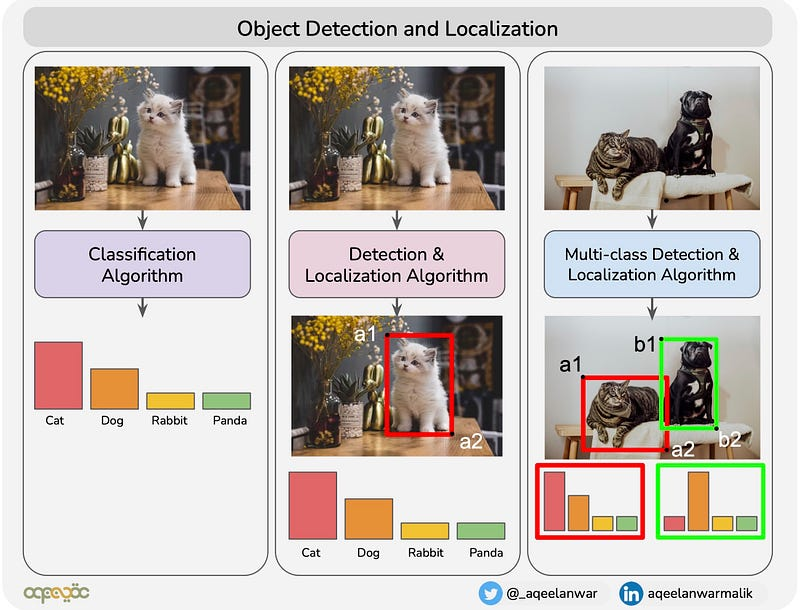

In [ ]:
# Difference between Classification and Object Detection & Localization algorithms

from IPython import display
display.Image("data/images/CV_09_Object_Detection_Metrics-01.jpg")

So, it not only predicts the class label but also tells us where in the picture the predicted class is. Hence, to evaluate the performance of the Object Detection and Localization algorithm, we need to evaluate if the predicted class is the actual class and how close the predicted bounding box is to the ground truth.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Evaluation Metrics

The performance of the Object Detection and Localization algorithm is evaluated by a metric called Average Precision (AP) and Mean Average Precision (mAP). Before we get into the detail of what AP is, let's make one thing clear about what it is NOT.

**AP is NOT the average of precision across the different classes.**

AP is calculated with the help of several other metrics such as IoU, Confusion Matrix (TP, FP, FN), Precision and Recall, etc as shown in the figure below.

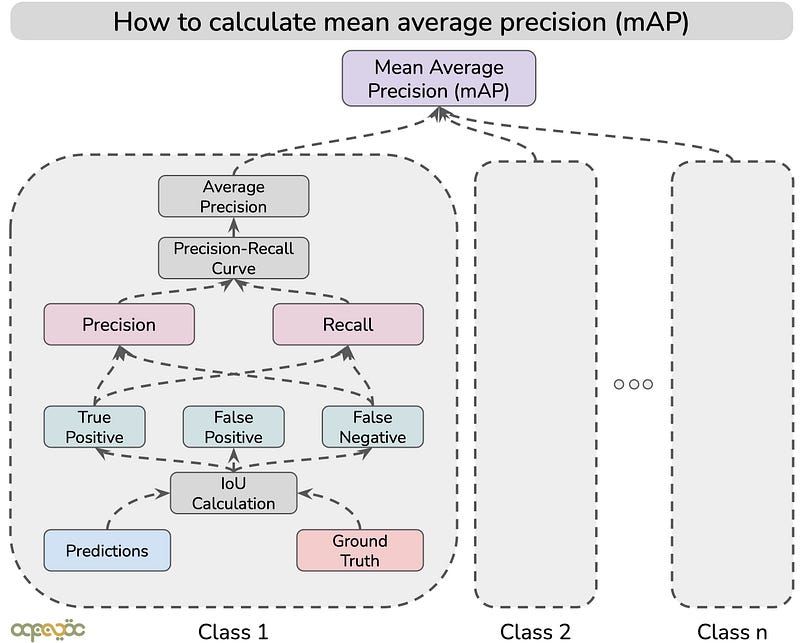

In [ ]:
# Mean Average Precision

from IPython import display
display.Image("data/images/CV_09_Object_Detection_Metrics-02.jpg")

To understand AP and mAP, we first need to understand these metrics.

## 1. Intersection over Union (IoU)

IoU quantifies the closeness of the two bounding boxes (ground truth and prediction). It's a value between 0 and 1. If the two bounding boxes overlap completely, then the prediction is perfect and hence the IoU is 1. On the other hand, if the two bounding boxes don’t overlap, the IoU is 0. The IoU is calculated by taking the ratio between the area of intersection and the area of the union of two bounding boxes as shown below.

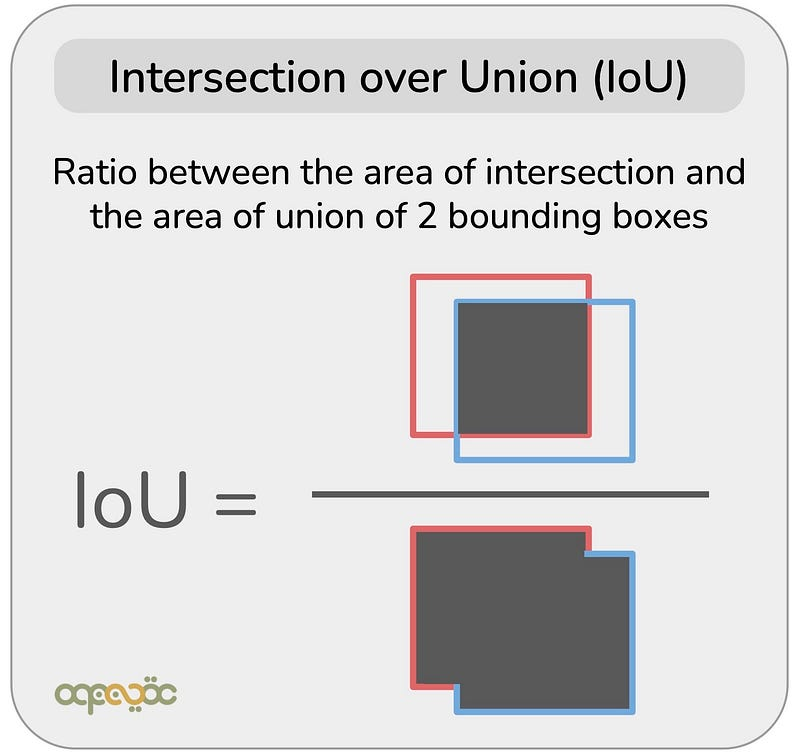

In [ ]:
# Intersection over Union (IoU)

from IPython import display
display.Image("data/images/CV_09_Object_Detection_Metrics-03.jpg")

## 2. True Positive, False Positive, False Negative

A prediction is said to be correct if the class label of the predicted bounding box and the ground truth bounding box is the same and the IoU between them is greater than a threshold value.

Based on the IoU, threshold, and the class labels of the ground truth and the predicted bounding boxes, we calculate the following three metrics

- **True Positive (TP):** The model predicted that a bounding box exists at a certain position (positive) and it was correct (true)

- **False Positive (FP):** The model predicted that a bounding box exists at a particular position (positive) but it was wrong (false)

- **False Negative (FN):** The model did not predict a bounding box at a certain position (negative) and it was wrong (false) i.e. a ground truth bounding box existed at that position.

- **True Negative (TN):** The model did not predict a bounding box (negative) and it was correct (true). This corresponds to the background, the area without bounding boxes, and is not used to calculate the final metrics.

The following example will help clarify True Positive, False Positive, and False Negative.

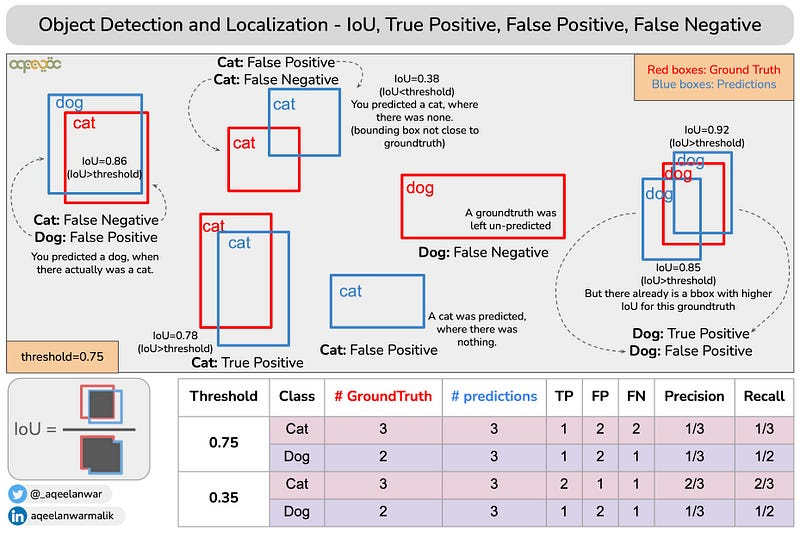

In [ ]:
# IoU, True Positive, False Positive, and False Negative

from IPython import display
display.Image("data/images/CV_09_Object_Detection_Metrics-04.jpg")

## 3. Precision and Recall

Based on the TP, FP, and FN, *for each labeled class*, we calculate two parameters: Precision and Recall.

- **Precision:** tells us how precise our model is i.e. out of total detected say cats, how many were actual cats. Hence, it is the ratio between the true positive and the total number of cat predictions (equivalently the sum of true positive and false positive) made by the model as shown below.

- **Recall:** Tells us how good the model is at recalling classes from images i.e. out of total cats in the input image how many was the model able to detect. Hence, it is the ratio between the true positive and the total number of ground truth cats (equivalently the sum of true positive and false negative) made by the model as shown below.

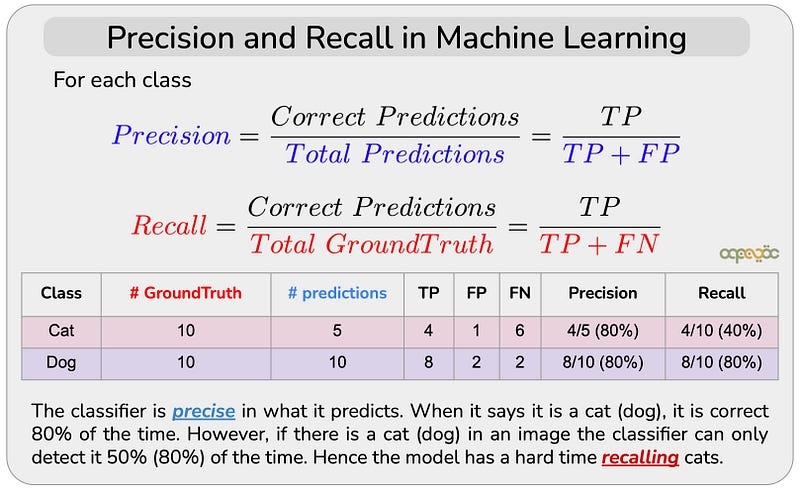

In [ ]:
# Precision and Recall in Machine Learning

from IPython import display
display.Image("data/images/CV_09_Object_Detection_Metrics-05.jpg")

From the figure above it can be seen that the **classifier is precise in what it predicts**. When it says it is a cat (dog), it is correct 80% of the time. However, if there is a cat (dog) in an image the classifier can only detect it 40% (80%) of the time. Hence the **model has a hard time recalling cats.**

## 4. Precision-Recall Curve

Ideally, we want both the Precision and Recall to be high i.e whatever is detected is correct and the model can detect all the occurrences of a class. The value of precision and recall depends on how many true positives were detected by the model.

Assigning a bounding box TP, FP, and FN depends on the following two things:

- The predicted label compared to the ground truth label

- The IoU between the two boxes

For a Multiclass Classification problem, the model outputs the conditional probability that the bounding box belongs to a certain class. The greater the probability for a class, the more chances the bounding box contains that class. The probability distribution along with a user-defined threshold (between 0 to 1) value is used to classify a bounding box.

The **smaller this probability confidence threshold**, the higher the number of detections made by the model, and the lower the chances that the ground-truth labels were missed and hence **higher the Recall** (generally, but not always). On the other hand, the **higher the confidence threshold**, the more confident the model is in what it predicts and hence **higher the Precision** (generally, but not always). We want both the Precision and Recall to be as high as possible, hence, there exists a tradeoff between Precision and Recall based on the value of the confidence threshold.

A Precision-Recall curve plots the value of Precision against Recall for different confidence threshold values.

With the Precision-Recall curve, we can see visually what confidence threshold is best for us (for our given application). An overly simplified example of the PR curve can be seen below:

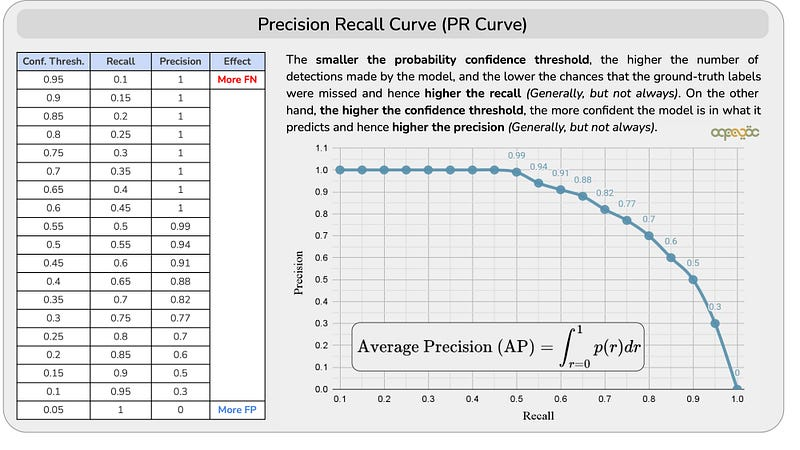

In [ ]:
# Precision-Recall Curve

from IPython import display
display.Image("data/images/CV_09_Object_Detection_Metrics-06.jpg")

## 5. Average Precision (AP)

Selecting a confidence value for your application can be hard and subjective. Average Precision is a key performance indicator that tries to remove this dependency of selecting one confidence threshold value.

Average Precision is the area under the Precision-Recall curve.

**Average Precision (AP) = $\boldsymbol{\int_{r = 0}^{1} p(r) dr}$**

AP summarizes the PR Curve to one scalar value. **Average Precision is high when both Precision and Recall are high, and low when either of them is low across a range of confidence threshold values.** The range for AP is between 0 to 1.

The following two approaches are usually used to find the area under the PR curve:

### 1. Approach 1 — Approximate the PR Curve with Rectangles

- For each precision-recall pair (j=0, …, n-1), the area under the PR curve can be found by approximating the curve using rectangles.

- The width of such rectangles can be found by taking the difference of two consecutive recall values $(r(k), r(k-1))$, and the height can be found by taking the maximum value of the precision for the selected recall values i.e. $w = r(k)-r(k-1), h = max(p(k), p(k-1))$.

- AP can be calculated by the sum of the areas of these rectangles as given below:

    **Average Precision (AP) = $\boldsymbol{\Sigma_{k=1}^{n-1} (r(k)-r(k-1)) \times max(p(k), p(k-1))}$**

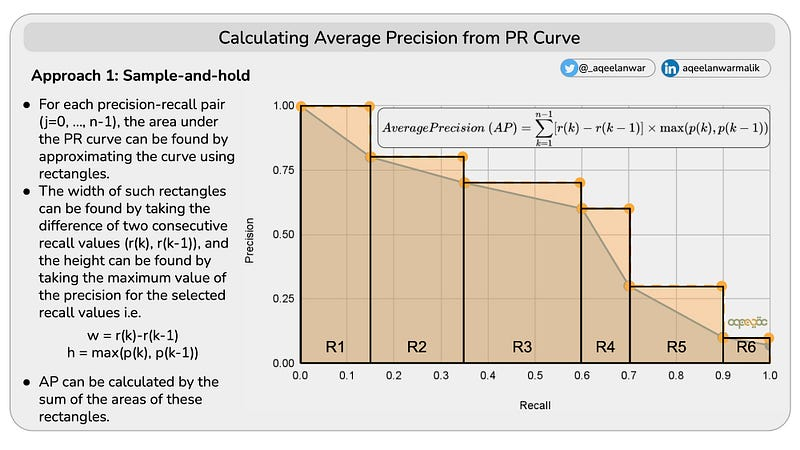

In [1]:
# Calculating Average Precision from PR curve by approximating the PR curve with rectangles

from IPython import display
display.Image("data/images/CV_09_Object_Detection_Metrics-07.jpg")

### 2. Approach 2 — Interpolation and 11-Point Average

- The precision values for the 11 recall values from 0.0 to 1.0 with an increment of 0.1 are calculated.

- These 11 points can be seen as orange samples in the figure below.

- AP can be calculated by taking the mean of these 11 precision values as given below:

    **Average Precision (AP) = $\boldsymbol{\frac {1}{11} \sum_{\substack{r = 0.0 \\ \text{step } 0.1}}^{1.0} p(r)}$**

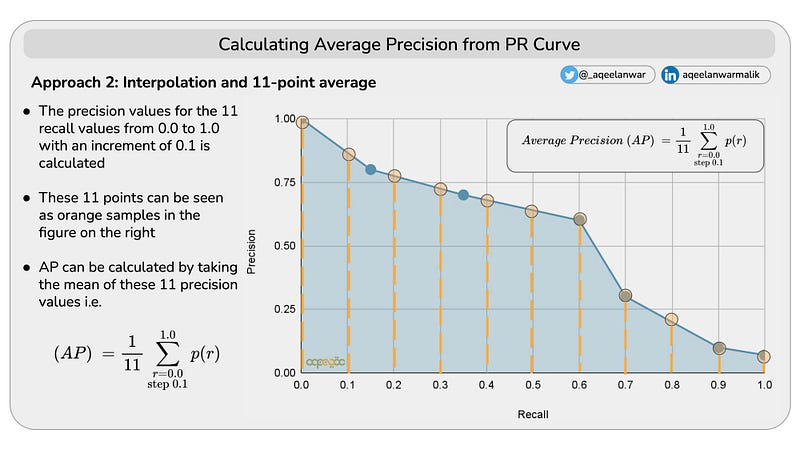

In [2]:
# Calculating Average Precision from PR curve by using Interpolation and 11-Point Average

from IPython import display
display.Image("data/images/CV_09_Object_Detection_Metrics-08.jpg")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)